In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
passengers1 = pd.read_csv('data/passenger2016_2017.csv')
passengers2 = pd.read_csv('data/passenger_2018.csv')
fuel_con = pd.read_csv('data/Fuel_consumption.csv')

In [3]:
passengers = pd.concat([passengers1,passengers2])

In [154]:
passengers.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [5]:
fuel_con.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,5100,0.0,5100,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,396216,140239.0,536455,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405,0.0,0.0,0.0,0.0,522405,569497,0.0,569497,2016


In [6]:
fuel_con.shape

(3035, 25)

In [164]:
fuel_con.columns

Index(['month', 'airline_id', 'unique_carrier', 'carrier', 'carrier_name',
       'carrier_group_new', 'sdomt_gallons', 'satl_gallons', 'spac_gallons',
       'slat_gallons', 'sint_gallons', 'ts_gallons', 'tdomt_gallons',
       'tint_gallons', 'total_gallons', 'sdomt_cost', 'satl_cost', 'spac_cost',
       'slat_cost', 'sint_cost', 'ts_cost', 'tdomt_cost', 'tint_cost',
       'total_cost', 'year'],
      dtype='object')

In [7]:
fuel_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              3035 non-null   int64  
 1   airline_id         3034 non-null   float64
 2   unique_carrier     3034 non-null   object 
 3   carrier            3035 non-null   object 
 4   carrier_name       3034 non-null   object 
 5   carrier_group_new  3035 non-null   int64  
 6   sdomt_gallons      3034 non-null   float64
 7   satl_gallons       3034 non-null   float64
 8   spac_gallons       3034 non-null   float64
 9   slat_gallons       3033 non-null   float64
 10  sint_gallons       3034 non-null   float64
 11  ts_gallons         3034 non-null   float64
 12  tdomt_gallons      3032 non-null   float64
 13  tint_gallons       3034 non-null   float64
 14  total_gallons      3029 non-null   float64
 15  sdomt_cost         3035 non-null   int64  
 16  satl_cost          3034 

In [8]:
fuel_con = fuel_con.dropna()

In [9]:
fuel_con.describe()

,month,airline_id,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
count,3025.000000,3025.000000,3025.000000,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,...,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3025.000000
mean,6.254876,20408.221157,2.006281,1.791154e+07,3.860602e+06,3.156567e+06,2.390550e+06,9.407720e+06,2.731926e+07,1.830585e+07,...,3.262806e+07,7.000216e+06,5.665954e+06,4.478031e+06,1.714420e+07,4.977226e+07,3.345527e+07,1.876509e+07,5.222037e+07,2016.836033
std,3.371041,529.813111,0.808945,4.345731e+07,1.406628e+07,9.709335e+06,8.099951e+06,3.020839e+07,7.015820e+07,4.360444e+07,...,8.118737e+07,2.634308e+07,1.789022e+07,1.525172e+07,5.640288e+07,1.308473e+08,8.152758e+07,5.668135e+07,1.312181e+08,1.368663
min,1.000000,19393.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,3.000000,20108.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.873000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.210000e+02,0.000000e+00,1.329020e+05,2016.000000
50%,6.000000,20368.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.261880e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.688250e+05,3.009350e+05,1.226004e+06,2017.000000
75%,9.000000,20436.000000,3.000000,8.304103e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.058525e+06,1.357070e+07,1.152392e+07,...,1.549656e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.019253e+06,2.170838e+07,1.871454e+07,4.138545e+06,2.557966e+07,2018.000000
max,12.000000,21974.000000,3.000000,2.062579e+08,8.813328e+07,5.928570e+07,5.501094e+07,1.689833e+08,3.499851e+08,2.073632e+08,...,5.321082e+08,2.321523e+08,1.636864e+08,1.208585e+08,4.883859e+08,1.020494e+09,5.383149e+08,4.942079e+08,1.032523e+09,2019.000000


<BarContainer object of 3025 artists>

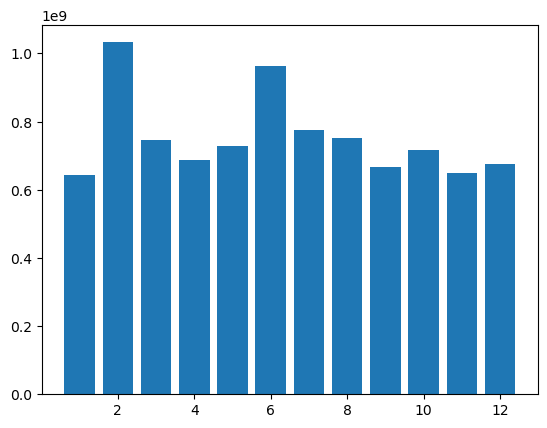

In [10]:
plt.bar(fuel_con['month'],fuel_con['total_cost'])

<BarContainer object of 3025 artists>

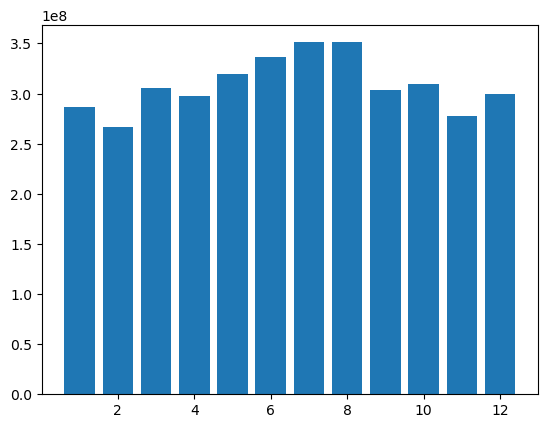

In [161]:
plt.bar(fuel_con['month'],fuel_con['total_gallons'])

In [12]:
passengers.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [13]:
passengers.describe()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,origin_airport_id,origin_city_market_id,dest_airport_id,dest_city_market_id,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group
count,2.350497e+06,2.350497e+06,2.350497e+06,2.350497e+06,2.350497e+06,2.350497e+06,2.350497e+06,2.350497e+06,2.350497e+06,2.350497e+06,...,2.350497e+06,2.350497e+06,2.350497e+06,2.350497e+06,2.350497e+06,2.350497e+06,2.350497e+06,2.350497e+06,2.350497e+06,2.350497e+06
mean,2.032856e+01,2.272094e+01,8.496111e+05,2.569276e+03,2.097178e+03,1.029555e+05,2.901765e+03,1.042512e+03,2.890172e+03,2.400282e+03,...,1.281340e+04,3.209723e+04,1.280434e+04,3.208804e+04,5.513907e+00,6.059703e+02,1.212115e+00,2.017030e+03,6.543674e+00,2.633967e+00
std,3.842310e+01,3.601781e+01,1.514312e+06,4.814856e+03,4.026722e+03,5.427418e+05,2.523352e+04,1.252014e+03,5.311266e+03,4.590902e+03,...,1.613503e+03,1.532944e+03,1.614425e+03,1.532302e+03,1.540559e+00,1.665164e+02,5.254621e-01,1.414796e+00,3.458192e+00,2.478318e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000500e+04,3.000300e+04,1.000500e+04,3.000300e+04,0.000000e+00,1.000000e+01,1.000000e+00,2.015000e+03,1.000000e+00,1.000000e+00
25%,0.000000e+00,1.000000e+00,3.887900e+04,5.000000e+01,1.100000e+01,0.000000e+00,0.000000e+00,2.840000e+02,1.140000e+02,9.000000e+01,...,1.129800e+04,3.085200e+04,1.129800e+04,3.085200e+04,6.000000e+00,6.140000e+02,1.000000e+00,2.016000e+03,4.000000e+00,1.000000e+00
50%,4.000000e+00,9.000000e+00,2.520000e+05,4.960000e+02,3.540000e+02,0.000000e+00,0.000000e+00,6.610000e+02,6.670000e+02,5.370000e+02,...,1.289200e+04,3.170300e+04,1.289200e+04,3.170300e+04,6.000000e+00,6.310000e+02,1.000000e+00,2.017000e+03,7.000000e+00,2.000000e+00
75%,2.800000e+01,3.000000e+01,1.060169e+06,3.380000e+03,2.661000e+03,3.528000e+03,0.000000e+00,1.234000e+03,3.675000e+03,2.892000e+03,...,1.410000e+04,3.319500e+04,1.410000e+04,3.319200e+04,6.000000e+00,6.910000e+02,1.000000e+00,2.018000e+03,1.000000e+01,3.000000e+00
max,2.361000e+03,1.311000e+03,1.524600e+08,1.103360e+05,9.577700e+04,1.316640e+08,8.163150e+06,1.032700e+04,8.957250e+05,2.141040e+05,...,1.687600e+04,3.684300e+04,1.687600e+04,3.684300e+04,8.000000e+00,8.900000e+02,4.000000e+00,2.019000e+03,1.200000e+01,2.100000e+01


In [152]:
departures = passengers[['origin_city_name','origin','departures_performed','passengers']].groupby(['origin','origin_city_name']).sum()

#dividing by 5 to make it a yearly sum
departures['departures_performed'] = departures['departures_performed']/5
departures['passengers'] = departures['passengers']/5

departures.sort_values('departures_performed',ascending=False)
departures = departures.rename(columns={'departures_performed':'yearly_departures_per_ap','passengers':'yearly_passengers_per_ap'})

departures.to_csv('data/departures_by_airport.csv')

In [158]:
departures.sort_values('yearly_departures_per_ap',ascending=False).head(10)

,,yearly_departures_per_ap,yearly_passengers_per_ap
origin,origin_city_name,,
ATL,"Atlanta, GA",436270.0,51495611.8
ORD,"Chicago, IL",433377.0,38803817.4
DFW,"Dallas/Fort Worth, TX",329119.4,32777698.0
LAX,"Los Angeles, CA",326591.6,41149051.0
DEN,"Denver, CO",280893.6,30204850.4
CLT,"Charlotte, NC",257268.0,22567735.0
IAH,"Houston, TX",225644.0,20781773.6
JFK,"New York, NY",218013.0,29785415.8
SFO,"San Francisco, CA",210293.4,26653215.2


In [159]:
departures.sort_values('yearly_passengers_per_ap',ascending=False).head(10)

,,yearly_departures_per_ap,yearly_passengers_per_ap
origin,origin_city_name,,
ATL,"Atlanta, GA",436270.0,51495611.8
LAX,"Los Angeles, CA",326591.6,41149051.0
ORD,"Chicago, IL",433377.0,38803817.4
DFW,"Dallas/Fort Worth, TX",329119.4,32777698.0
DEN,"Denver, CO",280893.6,30204850.4
JFK,"New York, NY",218013.0,29785415.8
SFO,"San Francisco, CA",210293.4,26653215.2
LAS,"Las Vegas, NV",177246.6,23505250.2
SEA,"Seattle, WA",205566.8,22792133.0


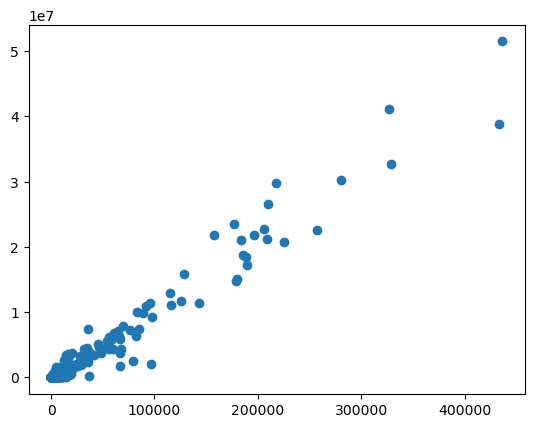

In [160]:
plt.scatter(departures['yearly_departures_per_ap'],departures['yearly_passengers_per_ap'])

In [162]:
arrivals = passengers[['dest_city_name','dest','departures_performed','passengers']].groupby(['dest','dest_city_name']).sum()

#dividing by 5 to make it a yearly sum
arrivals['departures_performed'] = arrivals['departures_performed']/5
arrivals['passengers'] = arrivals['passengers']/5

arrivals.sort_values('departures_performed',ascending=False)
arrivals = arrivals.rename(columns={'departures_performed':'yearly_arrivals_per_ap','passengers':'yearly_arriving_passengers_per_ap'})

arrivals.to_csv('data/arrivals_by_airport.csv')

In [163]:
arrivals.head()

,,yearly_arrivals_per_ap,yearly_arriving_passengers_per_ap
dest,dest_city_name,,
05A,"Little Squaw, AK",76.6,168.6
06A,"Kizhuyak, AK",7.0,3.6
08A,"Elizabeth Island, AK",2.2,3.4
09A,"Homer, AK",7.4,13.0
1B1,"Hudson, NY",1.2,3.2


In [62]:
passengers['carrier'].value_counts()

DL     215864
UA     188250
WN     183181
AA     133516
OO     128046
        ...  
0GQ         4
X7          4
HYP         4
3GQ         4
LDQ         2
Name: carrier, Length: 388, dtype: int64

In [15]:
passengers_passed = passengers[['origin_city_name','origin','passengers']].groupby(['origin','origin_city_name']).sum()
passengers_passed.sort_values('passengers',ascending=False).head(20)

,,passengers
origin,origin_city_name,
ATL,"Atlanta, GA",257478059
LAX,"Los Angeles, CA",205745255
ORD,"Chicago, IL",194019087
DFW,"Dallas/Fort Worth, TX",163888490
DEN,"Denver, CO",151024252
JFK,"New York, NY",148927079
SFO,"San Francisco, CA",133266076
LAS,"Las Vegas, NV",117526251
SEA,"Seattle, WA",113960665


In [68]:
#passengers by air carrier
passengers_bycarrier = passengers[passengers['year']>2017][['carrier','passengers']].groupby('carrier').sum().sort_values('passengers',ascending=False)

In [70]:

fuel_con['carrier'].unique()

array(['0WQ', '23Q', '27Q', '5V', '5X', '5Y', '8C', '9E', '9S', 'AA',
       'ABX', 'AS', 'B6', 'CP', 'DL', 'EE', 'EV', 'F9', 'FX', 'G4', 'G7',
       'GFQ', 'GL', 'HA', 'K8', 'KAQ', 'KD', 'KH', 'KLQ', 'L2', 'M6',
       'MQ', 'N8', 'NC', 'NK', 'OH', 'OO', 'PFQ', 'PO', 'PRQ', 'QX', 'S5',
       'SY', 'U7', 'UA', 'VX', 'WE', 'WI', 'WP', 'X9', 'XP', 'YV', 'YX',
       'ZW', 'WN', '09Q', '1BQ', 'WL', '0JQ', '16', 'FCQ', 'MRQ', 'US',
       '2HQ', '3EQ'], dtype=object)

In [71]:
#total fuel consumption per air carrier
fuel_con_bycarrier = fuel_con[fuel_con['year']>2017][['carrier','total_gallons']].groupby('carrier').sum().sort_values('total_gallons',ascending=False)

In [90]:
df = pd.read_csv('data/model_df_version_1.csv')

In [91]:
df['month'] = pd.DatetimeIndex(df['fl_date']).month
df['weekday'] = pd.DatetimeIndex(df['fl_date']).weekday
df['year'] = pd.DatetimeIndex(df['fl_date']).year

In [92]:
flights_by_carriermonth = df[['mkt_unique_carrier','month','year','distance','dep_delay']].groupby(['mkt_unique_carrier','month','year']).sum()

In [93]:
average_by_carrier = flights_by_carriermonth[['distance','dep_delay']].groupby('mkt_unique_carrier').mean()

In [94]:
qtendf = average_by_carrier.merge(fuel_con_bycarrier,how = 'left', left_index = True, right_index=True)
qtendf = qtendf.merge(passengers_bycarrier,how = 'left', left_index = True, right_index=True)

In [95]:
qtendf

,distance,dep_delay,total_gallons,passengers
mkt_unique_carrier,,,,
AA,1.165293e+06,17462.958333,6.416096e+09,304746529
AS,3.507076e+05,1179.083333,1.275982e+09,70089219
B6,2.688063e+05,4118.333333,1.515474e+09,85090518
DL,1.008219e+06,13638.541667,6.310645e+09,315159095
F9,1.052295e+05,1751.500000,4.728716e+08,42633884
G4,7.231792e+04,920.708333,3.404517e+08,28969388
HA,4.694338e+04,182.666667,4.753299e+08,23172647
NK,1.583252e+05,1537.250000,7.666939e+08,63808599
UA,1.004148e+06,17035.250000,6.123717e+09,230411082


In [96]:
median_gallon = qtendf[qtendf['total_gallons']>0]['total_gallons'].median()

In [97]:
qtendf['passengers'] = qtendf['passengers']/24

In [98]:
qtendf['total_gallons'] = qtendf['total_gallons'].where(qtendf['total_gallons']>0,avg_gallon)
qtendf['monthly_distance_per_passenger'] = (qtendf['passengers']/qtendf['distance'])
qtendf['avgfuel_percustomer_perdistance'] = qtendf['total_gallons']/qtendf['monthly_distance_per_passenger']
qtendf['delay_ratio'] = qtendf['dep_delay']/qtendf['avgfuel_percustomer_perdistance']*10000

In [99]:
qtendf[qtendf['total_gallons']>0][['dep_delay','delay_ratio','avgfuel_percustomer_perdistance']].sort_values(by='dep_delay',ascending=False)

,dep_delay,delay_ratio,avgfuel_percustomer_perdistance
mkt_unique_carrier,,,
AA,17462.958333,0.296578,5.888144e+08
UA,17035.250000,0.265967,6.405021e+08
DL,13638.541667,0.281487,4.845182e+08
WN,11777.750000,0.539435,2.183351e+08
B6,4118.333333,0.358429,1.148995e+08
F9,1751.500000,0.625278,2.801156e+07
NK,1537.250000,0.336698,4.565665e+07
AS,1179.083333,0.076948,1.532321e+08
G4,920.708333,0.451387,2.039733e+07


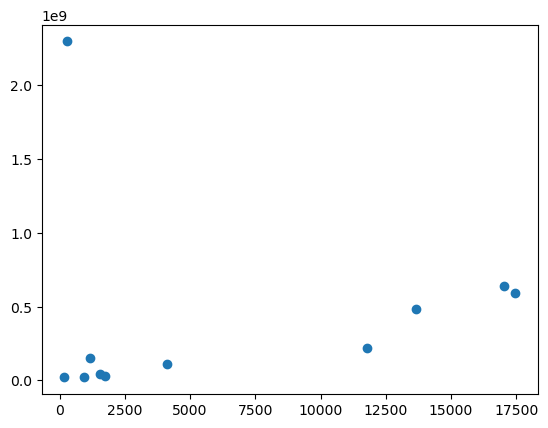

In [100]:
plt.scatter(qtendf['dep_delay'], qtendf['avgfuel_percustomer_perdistance'])

In [101]:
qtendf.head()

,distance,dep_delay,total_gallons,passengers,monthly_distance_per_passenger,avgfuel_percustomer_perdistance,delay_ratio
mkt_unique_carrier,,,,,,,
AA,1.165293e+06,17462.958333,6.416096e+09,1.269777e+07,10.896636,5.888144e+08,0.296578
AS,3.507076e+05,1179.083333,1.275982e+09,2.920384e+06,8.327119,1.532321e+08,0.076948
B6,2.688063e+05,4118.333333,1.515474e+09,3.545438e+06,13.189564,1.148995e+08,0.358429
DL,1.008219e+06,13638.541667,6.310645e+09,1.313163e+07,13.024578,4.845182e+08,0.281487
F9,1.052295e+05,1751.500000,4.728716e+08,1.776412e+06,16.881304,2.801156e+07,0.625278


In [102]:
qtendf = qtendf.rename(columns={'distance':'avg_distance_per_month_by_carrier','dep_delay':'avg_dep_delay_by_carrier','passengers':'passengers_by_carrier_per_month'})

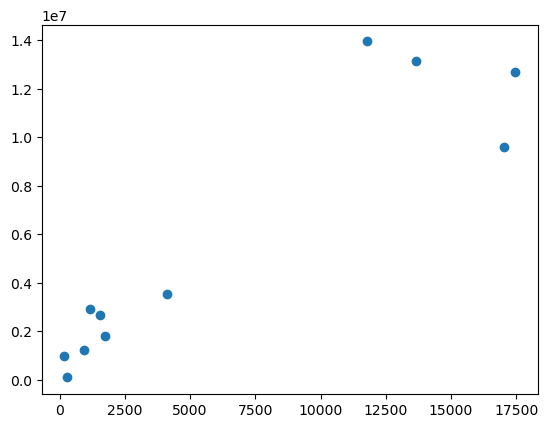

In [105]:
plt.scatter(qtendf['avg_dep_delay_by_carrier'],qtendf['passengers_by_carrier_per_month'])

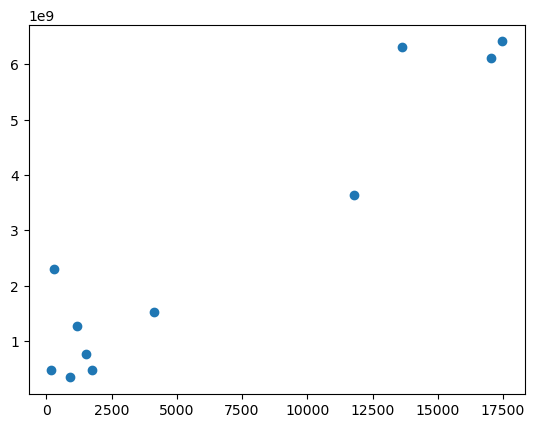

In [106]:
plt.scatter(qtendf['avg_dep_delay_by_carrier'],qtendf['total_gallons'])

In [107]:
qtendf = qtendf.drop(columns='delay_ratio')

In [109]:
qtendf.to_csv('data/passenger_fuel_df.csv')

In [ ]:
#still to make:
#passengers by month
#fuel by month
#delay by month
#passengers by arrival city?
#delay by arrival city?
#weather
#geographic region origin
#geographic region destination
#are all flights domestic?
#delay / cancellations prior week?